In [12]:
# mary

from neurotron import Cells, Train, Monitor
isa = isinstance

In [13]:
class Trainer(Train):
    def __init__(self,cells):
        super().__init__(cells)

    def prediction(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            counters = []; total = 0
            for key in info:
                if not key in ['#','@']:
                    n,refer,idx = info[key]
                    total += n
                    counters.append(n)
                    #print('    statistics: %s:' % key,(counters,total))
            result = []; k = 0
            src = self.address(context)
            for key in info:
                if not key in ['#','@']:
                    ratio = counters[k]/total
                    k += 1
                    n,refer,idx = info[key]
                    dst = self.address(refer)
                    result.append((refer,ratio,src,dst))
                    #print('    predict(%g%%): %s ->'%(100*ratio,key),info[key])
            return result

    def predict(self,context):
        results = self.prediction(context)
        for prediction in results:
            refer,ratio,src,dst = prediction
            print('    %g%%: ->' % (100*ratio),refer,src,dst)
    
    def address(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            #print('##### info:',info)
            m,n,d,s = self.cells.shape
            idx = train.code((info['@'][1])).list()[0]; 
            jdx = info['#'][0]
            assert len(idx) == len(jdx)
            kdx = [jdx[s]*m+idx[s] for s in range(len(idx))]
            #return ((m,n),idx,jdx,kdx)
            return kdx
        return None

    def plot(self,title=''):
        m,n,d,s = self.cells.shape
        mon = Monitor(m,n)
        self.cells.plot(mon,label=True)
        mon.title(title)

    def learn(self,context):
        results = self.prediction(context)
        for prediction in results:
            refer,ratio,src,dst = prediction
            print('    %g%%: ->' % (100*ratio),refer,src,dst)
            for k in dst:
                self.cells.X[k] = 1
            for k in src:
                self.cells.Y[k] = 1

            self.cells.connect(src,dst)
            title = 'learn: ' + refer
            self.plot(title)
            self.cells.relax()
        


In [14]:
cells = Cells('Mary')
train = Trainer(cells)
train('Lisa likes to paint .',2)
train('Lisa likes to dance .',8)
train('Mary likes to sing .',5)
train.prediction('<Lisa likes to>')

[('<Lisa likes to paint>', 0.2, [6, 14, 16], [10, 12, 14]),
 ('<Lisa likes to dance>', 0.8, [6, 14, 16], [8, 12, 14])]

    100%: -> <Mary likes> [0, 14, 16] [5, 14, 16]
    100%: -> <Mary likes to> [5, 14, 16] [7, 14, 16]


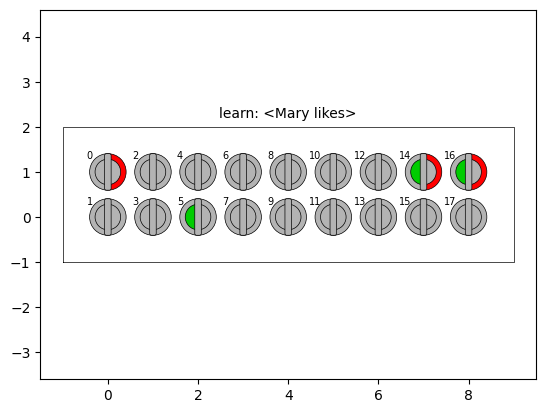

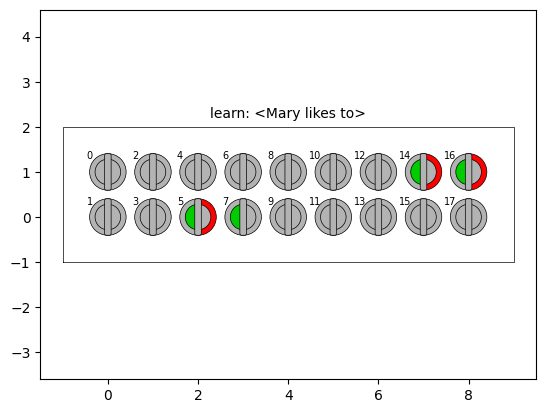

In [15]:
train.learn('<Mary>')
train.learn('<Mary likes>')

In [16]:
train.cells._predict.K.map()

+-000/0-+-002/2-+-004/4-+-006/6-+-008/8-+-010/A-+-012/C-+-014/E-+-016/G-+
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  0EG  |  0EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  5EG  |  5EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
+-001/1-+-003/3-+-005/5-+-007/7-+-009/9-+-011/B-+-013/D-+-015/F-+-017/H-+
|  000  |  000  |  0EG  |  5EG  |  000  |  000  |  000  |  000  |  000  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+


mind I[5].0: [0.1 0.1 0.1]
mind I[14].0: [0.1 0.1 0.1]
mind I[16].0: [0.1 0.1 0.1]
learn P[5].0: [0.6 0.6 0.6] by [0.1 0.1 0.1]
learn P[14].0: [0.6 0.6 0.6] by [0.1 0.1 0.1]
learn P[16].0: [0.6 0.6 0.6] by [0.1 0.1 0.1]
mind I[7].0: [0.1 0.1 0.1]
mind I[14].1: [0.1 0.1 0.1]
mind I[16].1: [0.1 0.1 0.1]


['likes', '->', 'to']

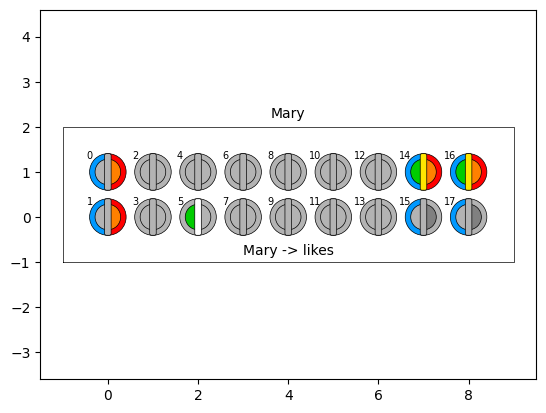

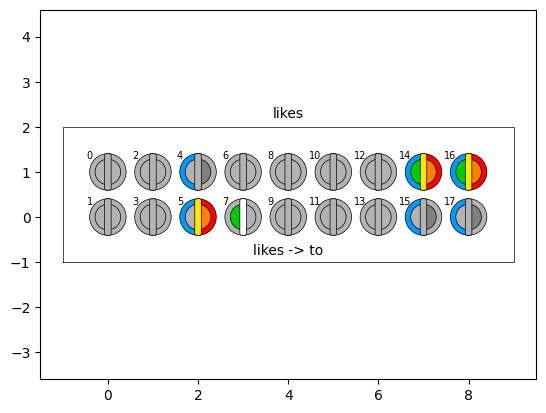

In [17]:
cells.process('Mary')
cells.process('likes')